# Fictional Character Battle Prediction

## Overview
- The goal of this project is to analyze characters from Marvel and DC Comics to predict the outcomes of battles between them based on their attributes, such as strength, speed, intelligence, special abilities, and weaknesses. By understanding which attributes contribute most to a character's success in battle, this analysis aims to provide actionable insights for Marvel Studios and DC. These insights will help inform movie scripting decisions, ensuring that the portrayal of characters and the storyline align with fans' expectations and logical battle outcomes.

## Business Problem
- Marvel Studios and DC are planning to create a final showdown movie featuring characters from both universes. The success of this movie depends on accurately depicting the strengths and abilities of these characters to create engaging and believable battle sequences. The challenge is to predict which characters would realistically win in battles against each other, based on their attributes and abilities. This requires a robust analytical approach to model these battles and provide predictions that are both data-driven and aligned with the established lore of the characters. The results will help the studios make informed decisions about character roles, matchups, and plot developments in the movie, enhancing the storyline's appeal and maintaining the integrity of the characters.

## Key Stakeholders
1. **Marvel Studios and DC Films Executives:** Decision-makers who need insights for directing the showdown movie. They are interested in understanding which characters would win in various matchups to create an engaging storyline.
2. **Screenwriters and Scriptwriters:** Creatives responsible for developing the script and dialogue for the movie. They will use the data-driven insights to ensure the character battles are compelling and align with the narrative vision.
3. **Directors and Producers:** They will need to know which characters should be portrayed in specific roles or fight scenes based on predicted outcomes. This helps with planning the choreography and directing the action sequences.
4. **Marketing and Public Relations Teams:** They are interested in how the outcomes of these battles could impact the movie's promotional strategy and audience reception. They might use the insights to build anticipation around certain character matchups.

## Key Questions
1. Which character attributes (e.g., strength, intelligence, speed, special abilities) most significantly influence the outcome of battles?
- Identify the key factors that determine battle success, allowing stakeholders to focus on these attributes when scripting and designing battles for the movie.

2. How do different combinations of character attributes affect the likelihood of winning a battle?
- Understanding the interplay between different attributes and how they contribute to a character's victory will provide deeper insights into character matchups and help in crafting realistic and exciting battle sequences.

3. Which specific matchups between Marvel and DC characters are most likely to result in an evenly matched and engaging battle?
- Identify pairs of characters whose abilities and attributes create balanced and thrilling confrontations, ensuring the movie's fights are both entertaining and unpredictable for the audience.

## Data Overview
- Data for this project was sourced from Kaggle. A repository for a number of datasets. This data contains columns such as:
- This dataset features a variety of characters where powers and attributes have been switched and shuffled to get unpredictable scenarios.

- This dataset has columns such as:
1. **Character:** Categorical variable representing the name of the fictional character.eg.Spider-Man, Iron Man, Captain America, Thor, Batman, Superman, Wonder Woman, Flash.
2. **Universe:** Categorical variable representing the universe or franchise from which the character originates.eg. Marvel, DC Comics.
3. **Strength:** Numerical attribute representing the character's physical strength on a scale from 1 to 10.
4. **Speed:** Numerical attribute representing the character's speed or agility on a scale from 1 to 10.
5. **Intelligence:** Numerical attribute representing the character's intelligence or strategic thinking on a scale from 1 to 10.
6. **Special Abilities:** Categorical variable representing special powers or abilities possessed by the character. They include Flight, Invisibility, Super Strength, Telekinesis.
7. **Weaknesses:** Categorical variable representing vulnerabilities or weaknesses of the character such as Kryptonite, Magic, Wooden Stake, Silver.
8. **Battle Outcome (Target Variable):** Binary variable indicating the outcome of the battle.Values: 1 (Character 1 wins), 0 (Character 2 wins).

## Analysis Goals
1. Identify Key Attributes for Battle Success:
- Determine which character attributes (e.g., strength, intelligence, speed, special abilities) are most predictive of winning a battle. This will help stakeholders focus on these key attributes when scripting and visualizing fight scenes.

2. Develop Predictive Models for Battle Outcomes:
Create models (e.g., logistic regression, SVM, decision trees) that can accurately predict the outcomes of battles based on character attributes and abilities. This will allow stakeholders to simulate different matchups and explore potential outcomes for the movie plot.

3. Analyze Synergies and Trade-offs Between Attributes:
Understand how different combinations of attributes (e.g., high speed and intelligence vs. high strength and durability) interact to influence battle outcomes. This can help in designing complex and multi-dimensional characters who provide interesting dynamics in battle scenes.

## Expected Outcomes
1. Ranked List of Influential Attributes:
A clear ranking of which character attributes most significantly impact battle outcomes, allowing for data-driven decisions in character portrayal and fight choreography.

2. Predictive Accuracy Metrics for Models:
A set of models with high predictive accuracy (e.g., AUC, F1 score) that can reliably forecast battle outcomes. This outcome would provide confidence in using these models to guide script development and matchup decisions in the movie.

3. Character Matchup Scenarios and Insights:
Detailed analysis of specific character matchups that are likely to produce balanced and engaging battles. This could include identifying surprising underdogs or highlighting strengths and weaknesses that could be strategically important in the story.

# Data Understanding
- Let's explore and analyze the data.

### Read The Dataset
- involves importing necessary libraries that will be used to explore our data, build models and perform analysis.

In [635]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#sklearn imports- for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import  LabelEncoder, QuantileTransformer, PowerTransformer



#scipy imports- for performing t-test
from scipy import stats
from scipy.stats import ttest_ind, f_oneway,shapiro #tttest_ind for independent t-test, f_oneway for ANOVA test, shapiro for normality test


#SMOTE imports- for handling imbalanced data
from imblearn.over_sampling import SMOTE



- After importing necessary libraries, we load and examine the data

In [636]:
#load the dataset
df = pd.read_csv('fictional_character_battles_complex.csv')

#display the shape of the dataset
print(f"Number of rows: {df.shape[0]} Number of columns: {df.shape[1]}")


Number of rows: 2351 Number of columns: 8


In [637]:
#display the first 5 rows of the dataset
df.head(10)

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0
5,Spider-Man,DC Comics,10,9,7,Invisibility,Wooden Stake,1
6,Wonder Woman,Marvel,3,6,2,Super Strength,Silver,1
7,Thor,DC Comics,7,2,4,Invisibility,Magic,1
8,Batman,DC Comics,8,2,7,Flight,Silver,0
9,Iron Man,DC Comics,5,5,4,Flight,Wooden Stake,0


- On displaying the head of the dataframe, the first thing we see is that some characters have been assigned to the wrong Universe. Hence we go ahead and clean that. 
-Thor, Spiderman, Captain America and Iron Man are marvel characters while Batman, Wonder Woman, Flash and Superman are DC characters

- Reassigning the Character Universe

In [638]:
# Lists of characters for each universe
marvel_characters = ['Thor', 'Spider-Man', 'Captain America', 'Iron Man']
dc_characters = ['Batman', 'Superman', 'Wonder Woman', 'Flash']

# Define a function to assign the correct universe
def assign_correct_universe(character):
    if character in marvel_characters:
        return 'Marvel'
    elif character in dc_characters:
        return 'DC Comics'
    else:
        return 'Unknown'  # For any character not listed in the predefined lists

# Apply the function to update the 'Universe' column based on the character
df['Universe'] = df['Character'].apply(assign_correct_universe)

# Display the updated DataFrame
print(df)

         Character   Universe  Strength  Speed  Intelligence SpecialAbilities  \
0     Wonder Woman  DC Comics         7      8             3      Telekinesis   
1         Iron Man     Marvel         4      7             9      Telekinesis   
2         Iron Man     Marvel         8      7             5      Telekinesis   
3       Spider-Man     Marvel         5      6            10      Telekinesis   
4            Flash  DC Comics         7      6             2     Invisibility   
...            ...        ...       ...    ...           ...              ...   
2346      Superman  DC Comics         9      8             5   Super Strength   
2347      Superman  DC Comics         2      5             8   Super Strength   
2348         Flash  DC Comics         5      3             3      Telekinesis   
2349        Batman  DC Comics         5     10             6           Flight   
2350    Spider-Man     Marvel         8      1             5   Super Strength   

        Weaknesses  BattleO

- Check for any null values

In [639]:
df.isnull().sum()

Character           0
Universe            0
Strength            0
Speed               0
Intelligence        0
SpecialAbilities    0
Weaknesses          0
BattleOutcome       0
dtype: int64

- There are no null values hence we go on to check if there are duplicated rows

In [640]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows in the dataset: ", duplicates)

Number of duplicate rows in the dataset:  15


- Drop duplicates

In [641]:
df = df.drop_duplicates()
print(f"Number of rows: {df.shape[0]} Number of columns: {df.shape[1]}")

Number of rows: 2336 Number of columns: 8


- Check the datatypes of the columns. Ensure they have the right data type

In [642]:
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 2336 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2336 non-null   object
 1   Universe          2336 non-null   object
 2   Strength          2336 non-null   int64 
 3   Speed             2336 non-null   int64 
 4   Intelligence      2336 non-null   int64 
 5   SpecialAbilities  2336 non-null   object
 6   Weaknesses        2336 non-null   object
 7   BattleOutcome     2336 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 164.2+ KB
None


- Describe the numerical columns. To know the mean, std dev, min, max, quartile values

In [643]:
print("Data Description: \n", df.describe())

Data Description: 
           Strength        Speed  Intelligence  BattleOutcome
count  2336.000000  2336.000000   2336.000000    2336.000000
mean      5.445634     5.477312      5.553510       0.278253
std       2.894660     2.858609      2.861493       0.448235
min       1.000000     1.000000      1.000000       0.000000
25%       3.000000     3.000000      3.000000       0.000000
50%       5.000000     6.000000      6.000000       0.000000
75%       8.000000     8.000000      8.000000       1.000000
max      10.000000    10.000000     10.000000       1.000000


### Remove Outliers

- We need to identify if the numerical columns have outliers. If they have outliers we need to discard the outliers either using:Z score(for normal distribution data) or the Inter Quartile Range method(for skewed data)

- Plot the histograms for the numerical columns to see what kind of distribution the data follows.

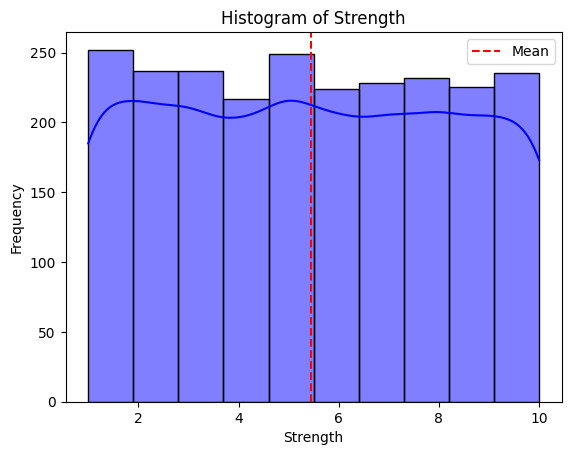

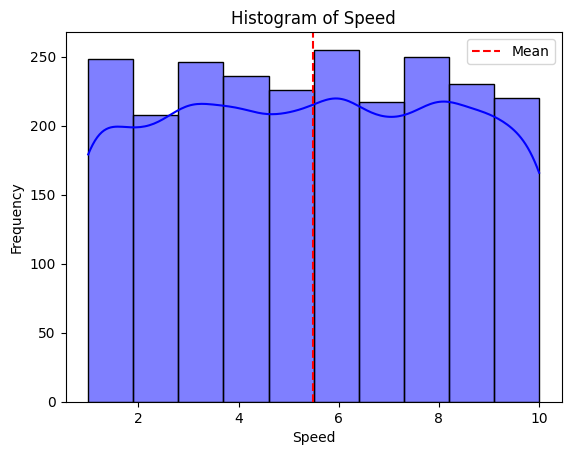

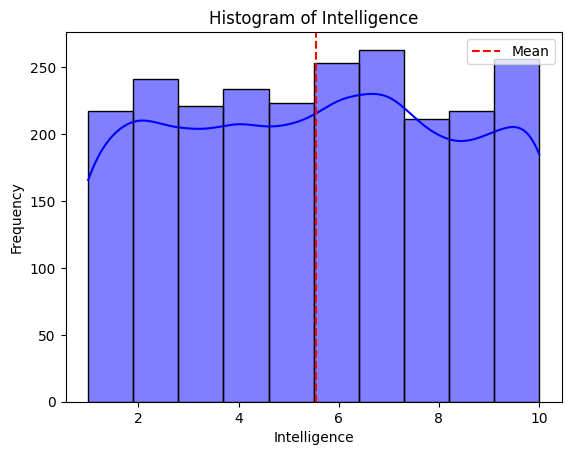

In [644]:
numeric_columns = ['Strength','Speed','Intelligence']

# loop through each column drawing a histogram for each
for col in numeric_columns:
    sns.histplot(df[col], kde=True, bins=10, color = 'blue')
    #plot the mean of the column
    plt.axvline(df[col].mean(),color='red', linestyle='--',label='Mean')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

- From the above plots we can clearly see that the numerical columns do not follow a normal distribution thus we can try to detect and remove outliers 
using the IQR method.

- Write a function to apply to all the numerical columns to detect and remove outliers


In [645]:
#function to detect and remove outliers
def detect_remove_outliers(df,numeric_columns):
    #loop through each column
    for col in numeric_columns:
        #get the q1 and q3 values
        q1 = df[col].quantile(0.25)
        q3 =df[col].quantile(0.75)
        #calculate the iqr
        iqr = q3 - q1

        #calculate the lower and upper bound
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        #remove the outliers
        df = df[(df[col]>lower_bound) & (df[col]< upper_bound)]
    return df


In [646]:
# apply the function to the dataset
df = detect_remove_outliers(df,numeric_columns)

- After calling the function on the numeric columns plot boxplots to see if the outliers have been removed.

Text(0, 0.5, 'Frequency')

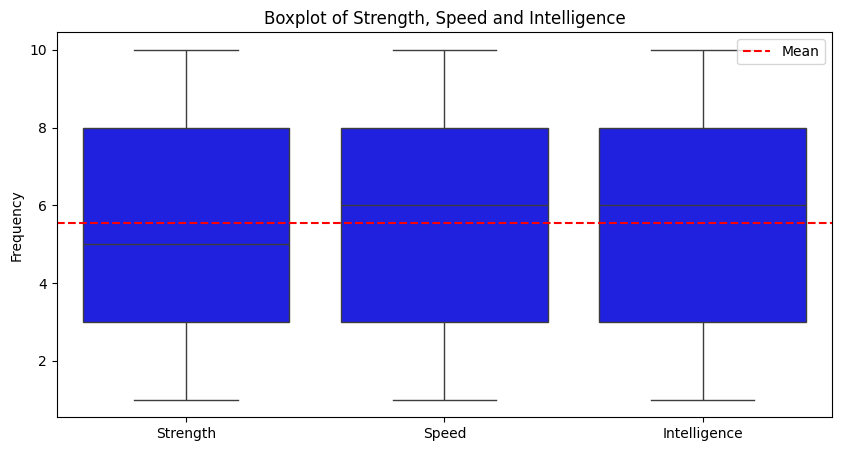

In [647]:
# draw a boxplot to check if the outliers have been removed
#plot subplots of the boxplot
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(df[numeric_columns], color='blue')
#set the mean of the column
ax.axhline(df[col].mean(),color='red', linestyle='--',label='Mean') 
ax.set_title(f"Boxplot of Strength, Speed and Intelligence")
ax.legend(loc='upper right')
ax.set_ylabel('Frequency')


- From the above boxplots we can see that the data has no outliers and  for Speed and Intelligence the median lines are at 6, meaning that half of the characters have a speed score below 6 and half have a speed score above 6, and similarly for intelligence.
- For Strength the median line is lower.
- This means that characters generally have higher median scores for speed and intelligence compared to strength. This suggests that, on average, characters tend to have greater speed and intelligence than strength.
The different medians indicate variations in the central tendency of these attributes.

### Transform  the Data

-  When working with algorithms such as Logistic Regression, SVM, data has to be transformed first. Transforming can involve either transforming data to have normal distribution, with a mean of 0 and standard deviation of 1 or transforming the data to have a minimum value of 0 and maximum value of 1.

- In our data we will use the QuantileTransformer and PowerTransformer.
 - Quantile Transformer transforms the data to have a uniform distribution now that we have removed outliers.
 - Power Transformer aims to make data more normal (Gaussian) by reducing skewness.

In [648]:
"""
Use QuantileTransformer to scale the data to a uniform distribution. Uniform distributiion because we have 
removed the outliers and our data is evenly distributed.
- Perform the Shapiro test to check if the data is normally distributed
"""
# Initialize QuantileTransformer and PowerTransformer
# Initialize transformers
scaler = QuantileTransformer()
scaler2 = PowerTransformer()

# Fit QuantileTransformer on the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Perform Shapiro-Wilk test for normality on each column
for column in numeric_columns:
    stat, p = shapiro(df[column])
    print(f'{column} has a t-statistic of {stat} and a p-value of {p}')

    # Apply PowerTransformer if data is not normally distributed
    if p < 0.05:
        df[[column]] = scaler2.fit_transform(df[[column]])
  


Strength has a t-statistic of 0.9473708530655712 and a p-value of 3.890286355653112e-28
Speed has a t-statistic of 0.9479653906887778 and a p-value of 5.357498210735711e-28
Intelligence has a t-statistic of 0.9476308991272525 and a p-value of 4.473228526477652e-28


- Shapiro test is used to check if the data is normally distributed, if p value is less than 0.05, then the data is not normally distributed and we apply the PowerTransformer. 
- On performing the Shapiro test we see that the columns are not normally distributed as their values are way smaller and less that 0.05. Hence we transform the columns using PowerTransformer to try make the data more Gaussian Like.




- After scaling data using PowerTransformer visualize the scaled data to see how it is distributed.

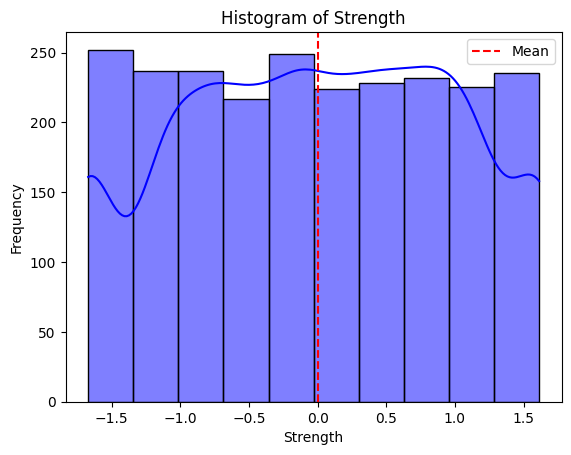

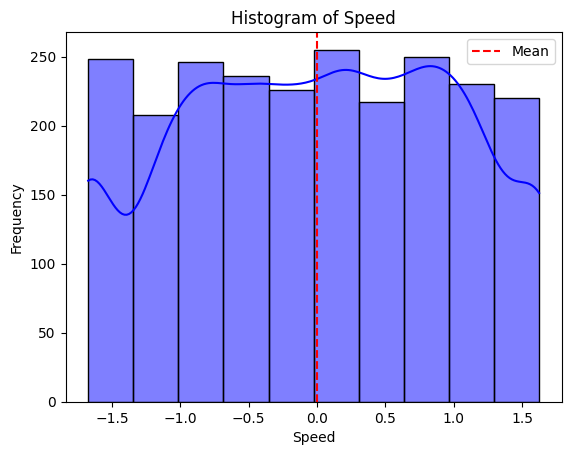

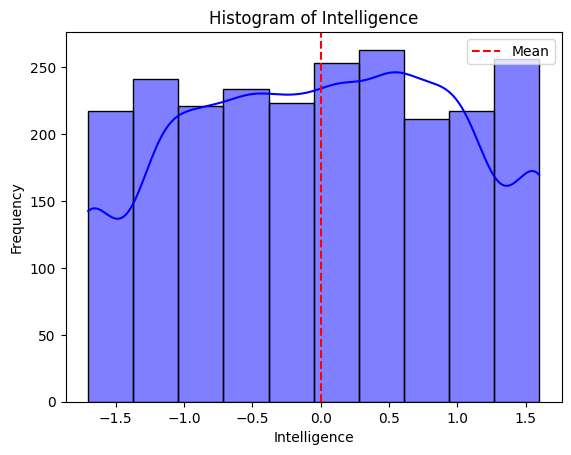

In [649]:
#check distribution after scaling
for col in numeric_columns:
    sns.histplot(df[col], kde=True, bins=10, color = 'blue')
    #plot the mean of the column
    plt.axvline(df[col].mean(),color='red', linestyle='--',label='Mean')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()
    


    

- The data has been uniformly transformed, variance reduced and mean set to 0.

### Statistical Tests  on the Numerical Columns(Strength, Speed, Intelligence)
- Perform TTest to see if there is a relationship between the Marvel and DC data. TTest are tests used to determine if there is a significant difference between the means of two groups.
- Perform anova test to check if there is significant relationship between the three numerical columns.

In [650]:
#perform tttest to check if there is a significant difference between the two groups
# Set the null and alternative hypotheses
null_hypothesis = "There is no significant difference between the two groups"
alternative_hypothesis = "There is a significant difference between the two groups"

# List of columns to test
numeric_columns = ['Strength','Speed','Intelligence']

# Loop through each column and perform t-test
print("T test results:")
for col in numeric_columns:
    t_stat, p_val = ttest_ind(df[df['Universe'] == 'Marvel'][col], df[df['Universe'] == 'DC Comics'][col])
    print(f'{col}: t-statistic = {round(t_stat, 3)}, p-value = {round(p_val, 3)}')

    # Check if the p-value is less than 0.05
    if p_val < 0.05:
        print(f'{col}: The difference between Marvel and DC is statistically significant (p < 0.05).')
    else:
        print(f'{col}: The difference between Marvel and DC is not statistically significant (p >= 0.05).')


T test results:
Strength: t-statistic = -0.567, p-value = 0.571
Strength: The difference between Marvel and DC is not statistically significant (p >= 0.05).
Speed: t-statistic = 1.242, p-value = 0.214
Speed: The difference between Marvel and DC is not statistically significant (p >= 0.05).
Intelligence: t-statistic = 1.346, p-value = 0.178
Intelligence: The difference between Marvel and DC is not statistically significant (p >= 0.05).


In [651]:
#perform ANOVA test to check if there is a significant difference between Strength, Speed and Intelligence
#perform the ANOVA test
print("ANOVA test results:")
f_stat,p_val = f_oneway(df['Strength'],df['Speed'],df['Intelligence'])
print(f"f-statistic: {round(f_stat,3)} p-value: {round(p_val,3)}")

if p_val < 0.05:
    print("There is a significant difference between the groups")
else:
    print("There is no significant difference between the groups")

ANOVA test results:
f-statistic: 0.0 p-value: 1.0
There is no significant difference between the groups


- Check for correlation between the Numerical Columns

In [652]:
# check for correlation between speed, strength and intelligence
correlation = df[['Strength', 'Speed', 'Intelligence']].corr()
correlation

,Strength,Speed,Intelligence
Strength,1.000000,-0.039054,0.007677
Speed,-0.039054,1.000000,-0.002932
Intelligence,0.007677,-0.002932,1.000000


- Plot a heatmap of the correlation

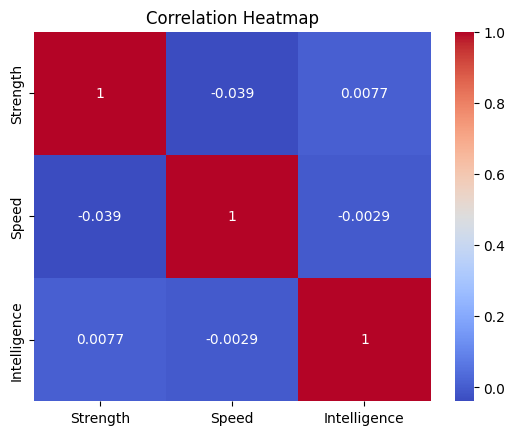

In [653]:
"""
plot a heatmap of the correlation
#with annot as true(annot is used to display the values on each cell) and cmap as coolwarm (cmap is used to set the color of the heatmap)
"""
sns.heatmap(correlation, annot = True, cmap='coolwarm') 
plt.title("Correlation Heatmap")
plt.show()


- Based on the correlation matrix, their correlations are less than 0.5 thus they have weak correlations between each other.

### Explore the categorical columns

- Examine each categorical column 

1. Character column

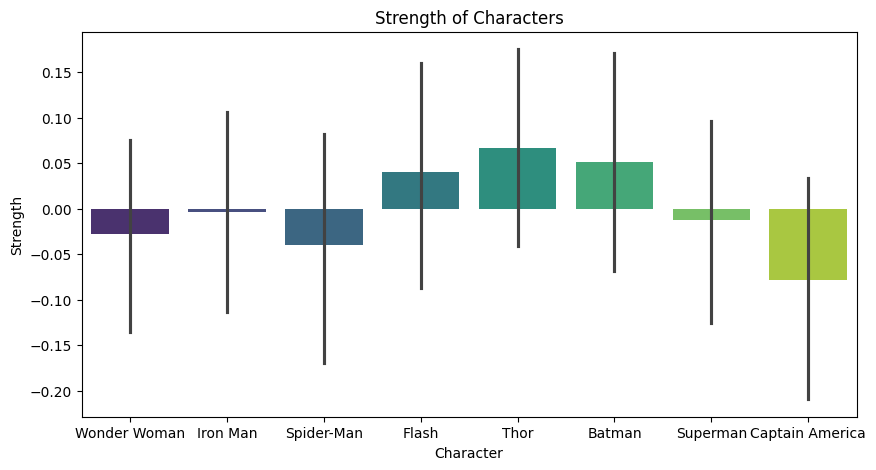

In [654]:
#character vs Strength
plt.figure(figsize=(10,5))
sns.barplot(x='Character',y='Strength',data=df, palette='viridis', hue='Character')
plt.title("Strength of Characters")
plt.show()


- List of characters in order of strength in Descending order


Universe   Character      
Marvel     Thor               0.066790
DC Comics  Batman             0.050990
           Flash              0.040517
Marvel     Iron Man          -0.003217
DC Comics  Superman          -0.012133
           Wonder Woman      -0.028164
Marvel     Spider-Man        -0.039731
           Captain America   -0.078933
Name: Strength, dtype: float64


Text(0, 0.5, 'Strength')

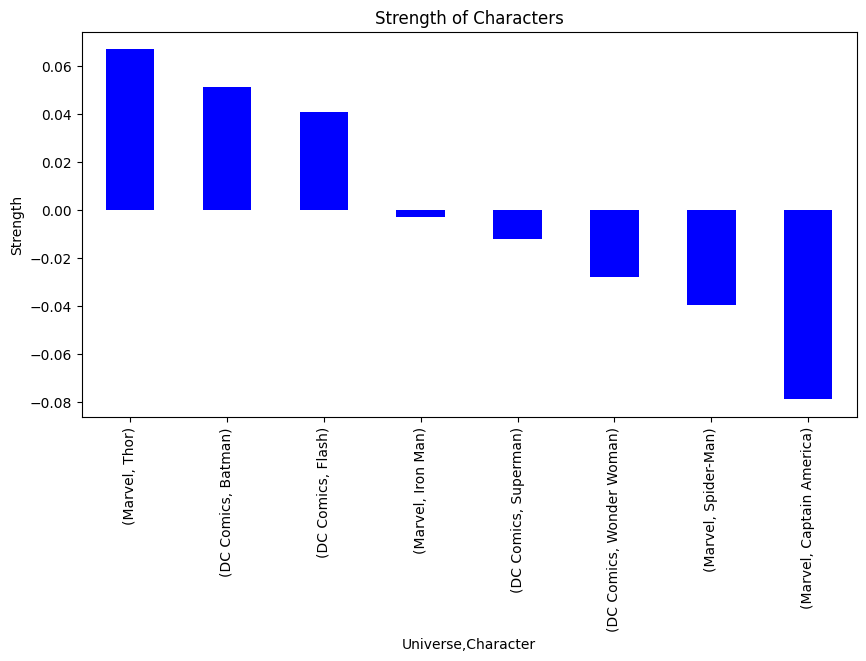

In [655]:
#list of characters in order of strength
character_strength= df.groupby(['Universe','Character'])['Strength'].mean().sort_values(ascending=False)
print(character_strength)
character_strength.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Strength of Characters")
plt.ylabel("Strength")



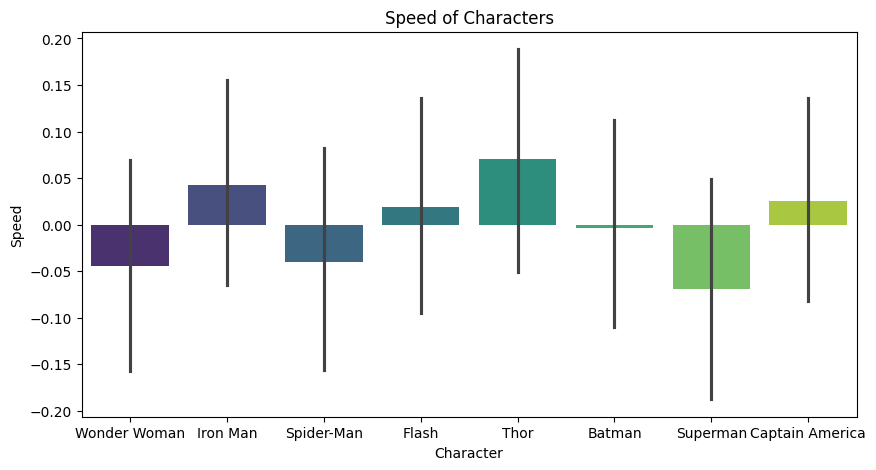

In [656]:
#character vs Speed
plt.figure(figsize=(10,5))
sns.barplot(x='Character',y='Speed',data=df, palette='viridis', hue='Character')
plt.title("Speed of Characters")
plt.show()


Universe   Character      
Marvel     Thor               0.070519
           Iron Man           0.043109
           Captain America    0.025631
DC Comics  Flash              0.019427
           Batman            -0.003462
Marvel     Spider-Man        -0.040679
DC Comics  Wonder Woman      -0.044151
           Superman          -0.069433
Name: Speed, dtype: float64


Text(0, 0.5, 'Speed')

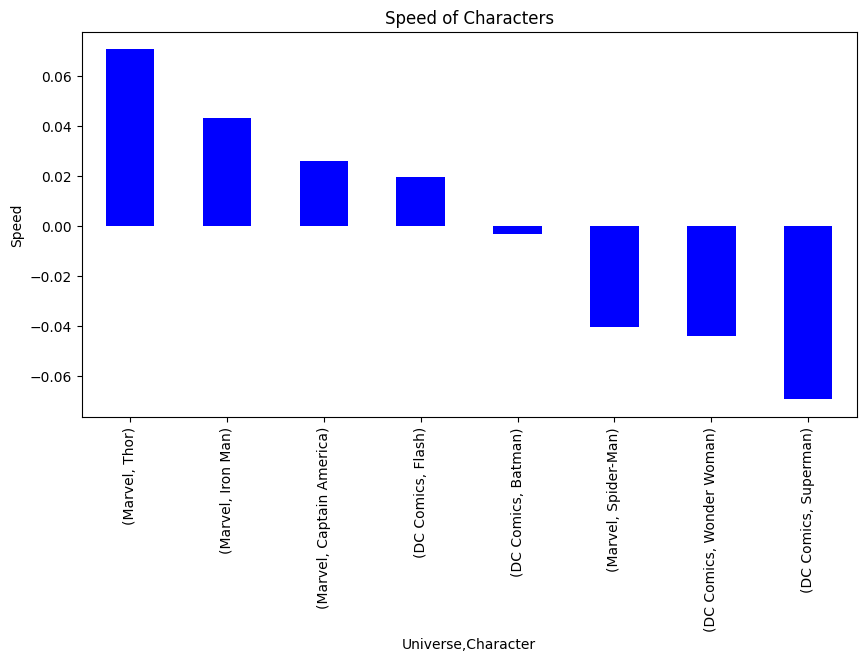

In [657]:
#list of characters in order of speed
character_speed = df.groupby(['Universe','Character'])['Speed'].mean().sort_values(ascending=False)
print(character_speed)
character_speed.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Speed of Characters")
plt.ylabel("Speed")


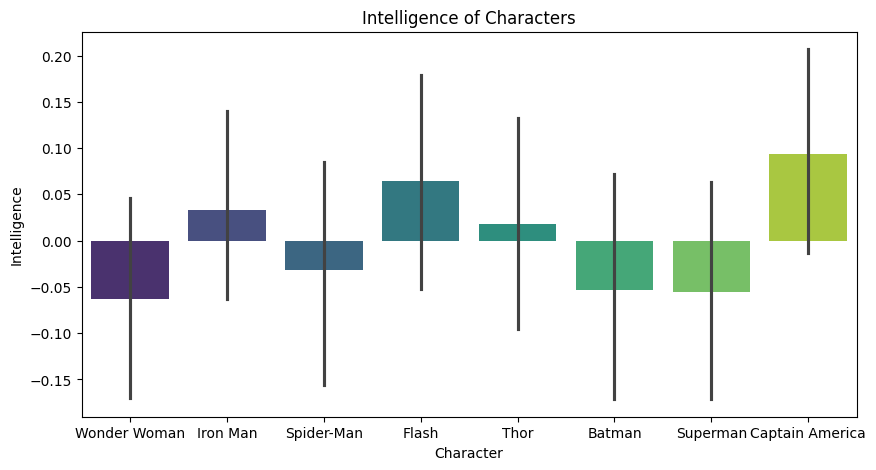

In [658]:
#character vs Intelligence
plt.figure(figsize=(10,5))
sns.barplot(x='Character',y='Intelligence',data=df, palette='viridis', hue='Character')
plt.title("Intelligence of Characters")
plt.show()

Universe   Character      
Marvel     Captain America    0.093575
DC Comics  Flash              0.064641
Marvel     Iron Man           0.032871
           Thor               0.018027
           Spider-Man        -0.031280
DC Comics  Batman            -0.053195
           Superman          -0.055984
           Wonder Woman      -0.063477
Name: Intelligence, dtype: float64


Text(0, 0.5, 'Intelligence')

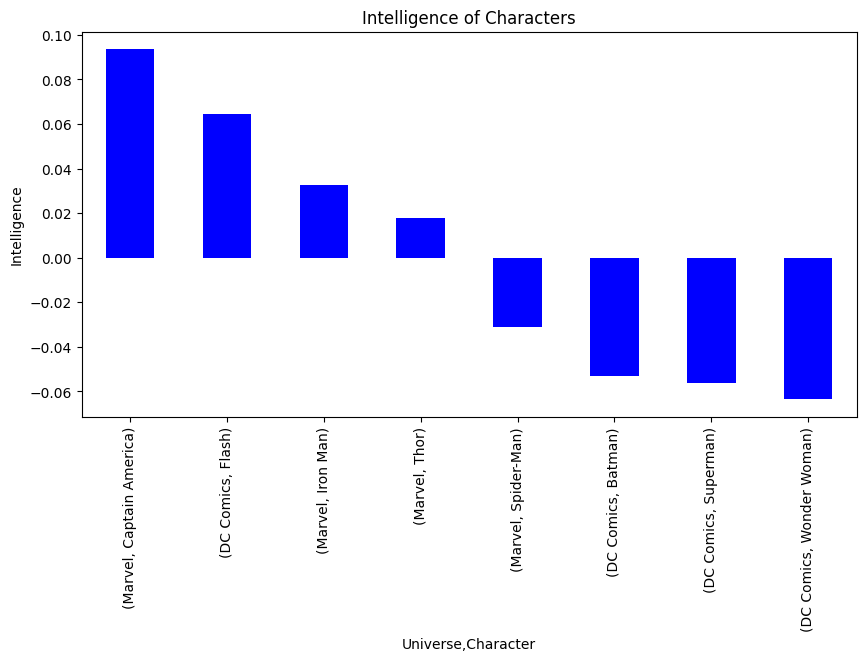

In [659]:
#list of characters in order of intelligence
character_intelligence = df.groupby(['Universe','Character'])['Intelligence'].mean().sort_values(ascending=False)
print(character_intelligence)
character_intelligence.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Intelligence of Characters")
plt.ylabel("Intelligence")


- From the above we see that Marvel has the highest performance when we come to Individual speed, strength and intelligence. This is because Thor is the strongest ans fastest based on the data and Captain America is the most intelligent.
- While for DC Comics Flash and Batman have taken the lead in terms of strongest, smartest and fastest.


2. Universe column

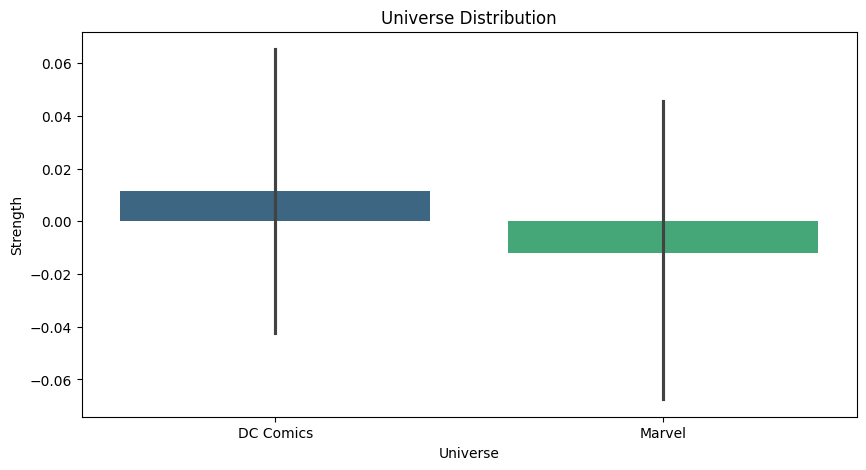

In [660]:
#universe vs Strength
plt.figure(figsize=(10,5))
sns.barplot(x=df['Universe'], y= df['Strength'], palette='viridis', hue=df['Universe'])
plt.title("Universe Distribution")
plt.show()

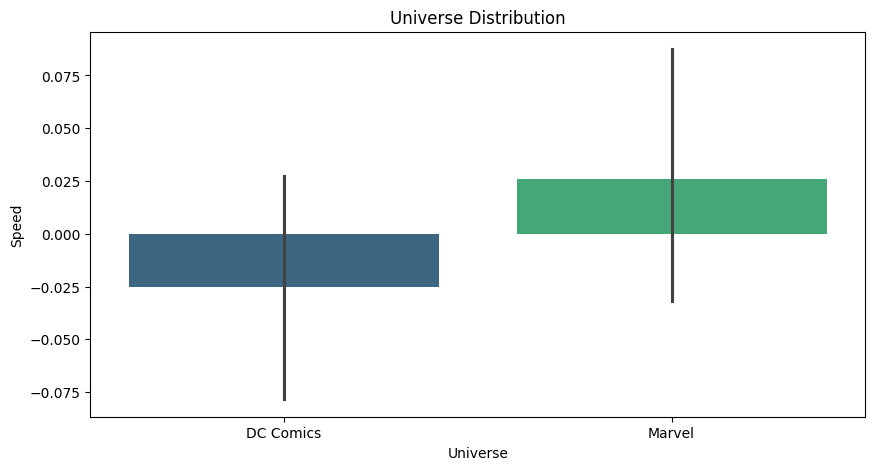

In [661]:
#universe vs Speed
plt.figure(figsize=(10,5))
sns.barplot(x=df['Universe'], y= df['Speed'], palette='viridis', hue=df['Universe'])
plt.title("Universe Distribution")
plt.show()


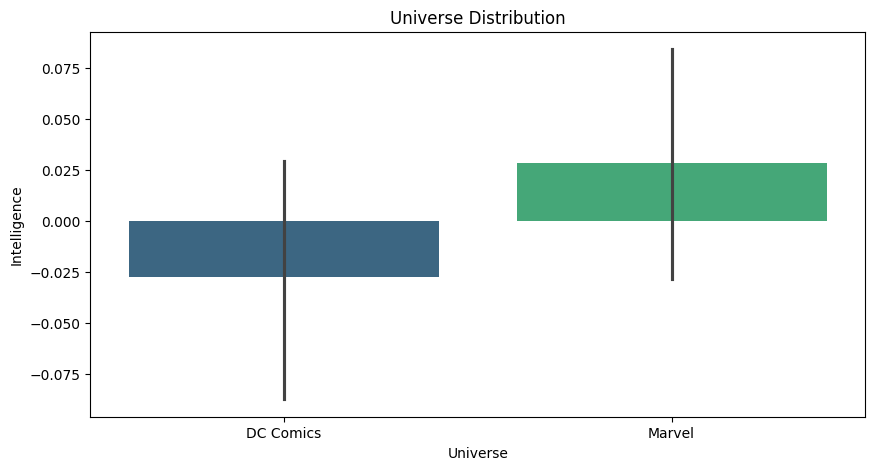

In [662]:
#universe vs Intelligence
plt.figure(figsize=(10,5))
sns.barplot(x=df['Universe'], y= df['Intelligence'], palette='viridis', hue=df['Universe'])
plt.title("Universe Distribution")
plt.show()


- From the three barplots we see that DC Comics has characters with the highest strength while Marvel characters in general are the smartest and fastest.

3. Special Abilities column

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4656\3583688191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['SpecialAbilities'], palette='viridis')


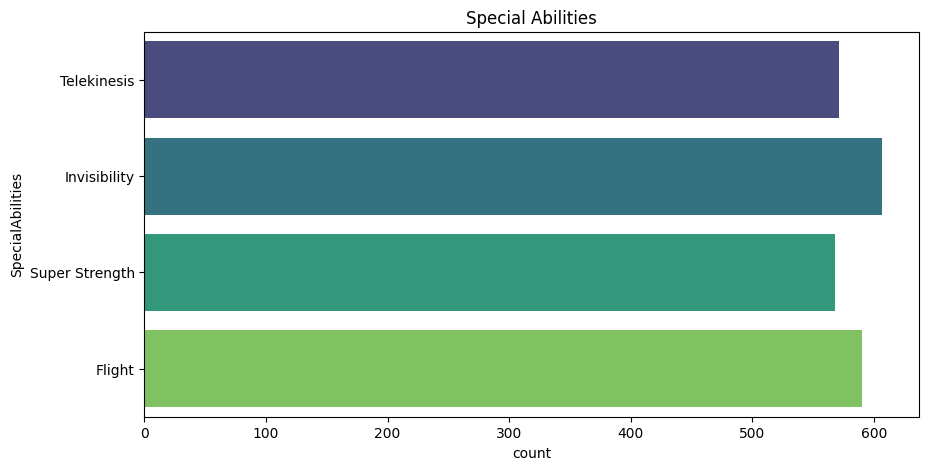

In [664]:
#special abilities
#plot the count of special abilities
plt.figure(figsize=(10,5))
sns.countplot(df['SpecialAbilities'], palette='viridis')
plt.title("Special Abilities")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4656\1050693785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SpecialAbilities', y='Strength', data=df, palette='viridis')


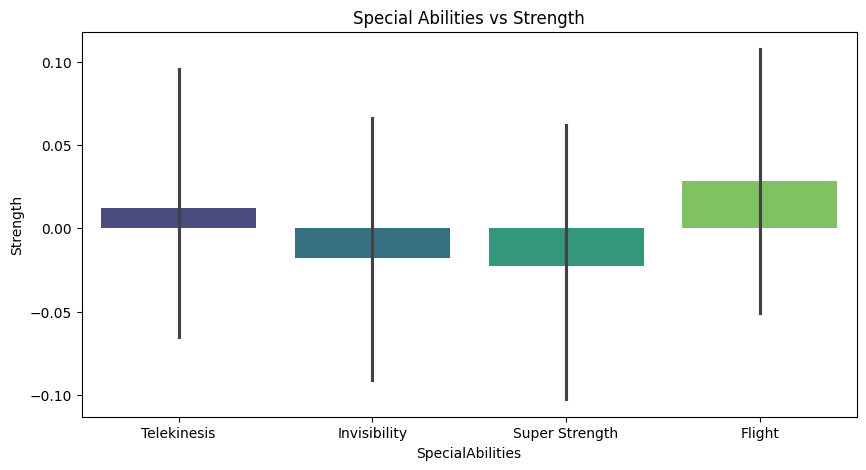

In [665]:
#plot special abilities vs Strength
plt.figure(figsize=(10,5))
sns.barplot(x='SpecialAbilities', y='Strength', data=df, palette='viridis')
plt.title("Special Abilities vs Strength")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4656\2041653873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SpecialAbilities', y='Speed', data=df, palette='viridis')


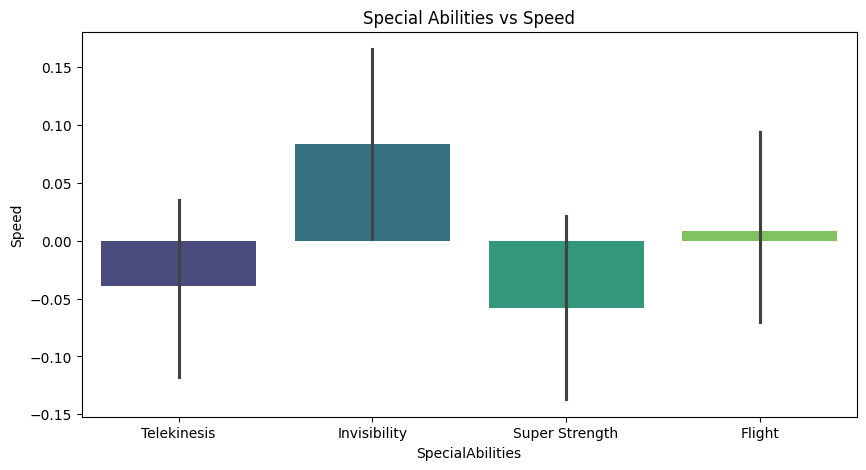

In [666]:
#plot special abilities vs Speed
plt.figure(figsize=(10,5))
sns.barplot(x='SpecialAbilities', y='Speed', data=df, palette='viridis')
plt.title("Special Abilities vs Speed")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4656\1475284177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SpecialAbilities', y='Intelligence', data=df, palette='viridis')


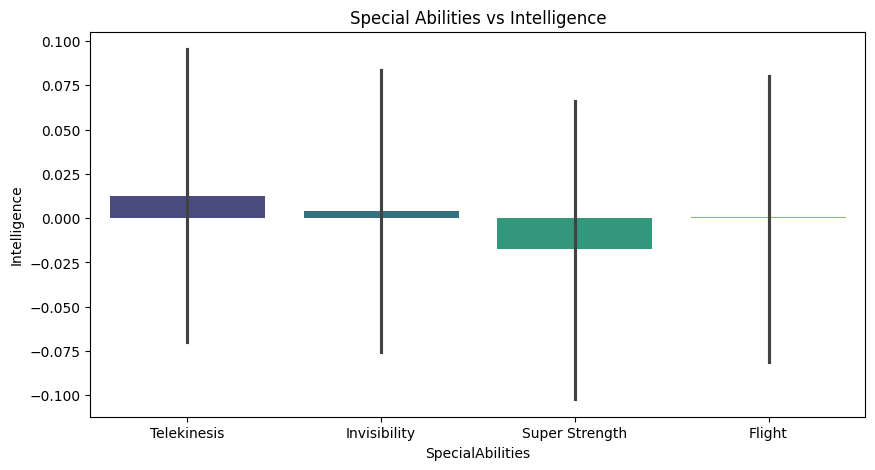

In [667]:
#plot special abilities vs Intelligence
plt.figure(figsize=(10,5))
sns.barplot(x='SpecialAbilities', y='Intelligence', data=df, palette='viridis')
plt.title("Special Abilities vs Intelligence")
plt.show()


- From the above special abilities analysis we see that characters with special abilities as Telekinesis and Invisibility are very intelligent, those with Invisibility or Flight or very fast while those with either Telekinesis or Flight are the strongest.
- The Super Strength is the same for both speed and strength but is higher in Intelligence.

In [668]:
#display characters and their special abilities in a pivot table
pivot_table = pd.pivot_table(df, index='Character', columns='SpecialAbilities', values='Strength', aggfunc='mean').sort_values(by='Flight', ascending=False)
pivot_table

SpecialAbilities,Flight,Invisibility,Super Strength,Telekinesis
Character,,,,
Flash,0.269543,-0.108732,-0.115813,0.077974
Batman,0.203293,-0.010209,0.055135,-0.048094
Thor,0.049037,0.166203,0.142977,-0.076859
Superman,-0.032672,-0.007549,-0.072985,0.073628
Spider-Man,-0.041064,0.000361,-0.114853,0.001698
Wonder Woman,-0.071491,-0.085227,0.023999,0.007750
Iron Man,-0.091284,-0.106976,0.106329,0.130961
Captain America,-0.118193,0.008386,-0.208428,-0.023526


- If we sort by Flight we see that Flash from DC Comics has the highest value in terms of Flight
- Thor from Marvel has the highest Invisibility and Super Strength values.
- Lastly Iron Man takes the lead when it comes to Telekinesis abilities.


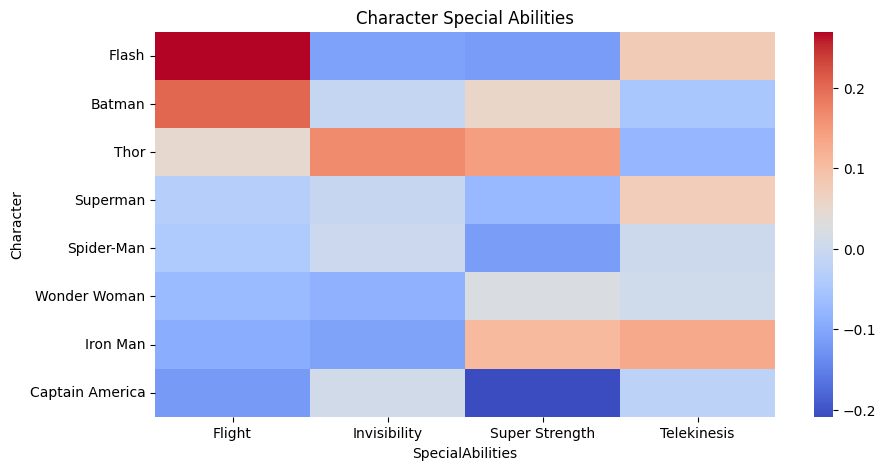

In [669]:
#plot the pivot table
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title("Character Special Abilities")
plt.show()

4. Weaknesses column

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4656\2035823262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Weaknesses'], palette='viridis')


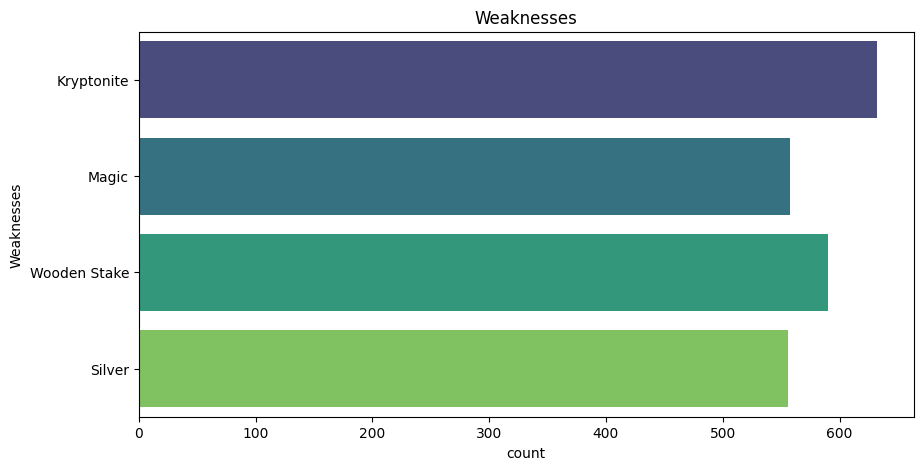

In [670]:
#plot the weaknesses of the characters
plt.figure(figsize=(10,5))
sns.countplot(df['Weaknesses'], palette='viridis')
plt.title("Weaknesses")
plt.show()

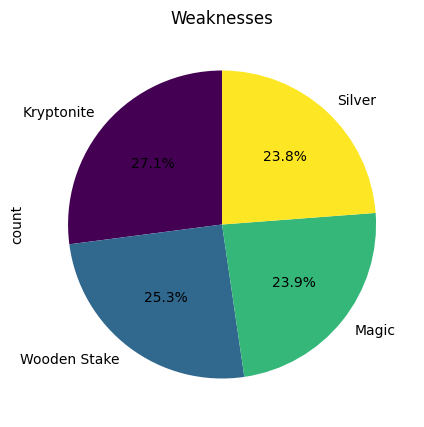

In [671]:
#plot a pie chart of the weaknesses
plt.figure(figsize=(10,5))
df['Weaknesses'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title("Weaknesses")
plt.show()


In [672]:
#create a table of each character and their weaknesses
pivot_table_weaknesses = pd.pivot_table(df, index='Character', columns='Weaknesses', values='Strength', aggfunc='count')
pivot_table_weaknesses

Weaknesses,Kryptonite,Magic,Silver,Wooden Stake
Character,,,,
Batman,70,75,61,73
Captain America,71,70,63,71
Flash,83,78,53,78
Iron Man,85,71,75,74
Spider-Man,77,63,64,71
Superman,83,65,84,73
Thor,84,67,72,75
Wonder Woman,79,69,84,75


- Now that we have explored each column we encode the categorical columns using Label Encoder. Encoding is creating dummy variables for column values.
- For this data, we will use the Label Encoder.Label Encoder assigns a unique integer to each category in the column. This is useful when working with machine learning models and each column has a number of categories.eg if a column has  categories like the Character Column which has values like Batman, Superman, Spiderman , Wonderwoman it encodes each name with a unique number alphabetically starting from 0.


In [674]:
#use label encoder to encode the categorical columns.
label = LabelEncoder()
#encode the character column
df['Character'] = label.fit_transform(df['Character'])
#encode the universe column
df['Universe'] = label.fit_transform(df['Universe'])
#encode the special abilities column
df['SpecialAbilities'] = label.fit_transform(df['SpecialAbilities'])
#encode the weaknesses column
df['Weaknesses'] = label.fit_transform(df['Weaknesses'])

#display the first 5 rows of the dataset
df.head()


,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,7,0,0.522431,0.843695,-0.840839,3,0,0
1,3,1,-0.449693,0.523094,1.119064,3,0,0
2,3,1,0.839270,0.523094,-0.181947,3,1,0
3,4,1,-0.120126,0.194450,1.597641,3,0,0
4,2,0,0.522431,0.194450,-1.185501,1,1,0


- Now that all our column values are numerical we can go ahead to split our data to build models.

### Splitting Data

In [676]:
#X and y
X = df.drop('BattleOutcome', axis=1)
y = df['BattleOutcome']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



- After splitting our data into training and testing data, we will list the algorithms we want to use on this data.
- The algorithms are the Logistic Regression, SVM , Decision Tree and Random Forest.


### Fitting models

In [677]:
#initialize the models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

- Loop through the models and for each get the accuracy,classification report and from the report get the precision, f1 score, recall. Afterwards append the results to the dataframe then get the confusion matrix and plot it.

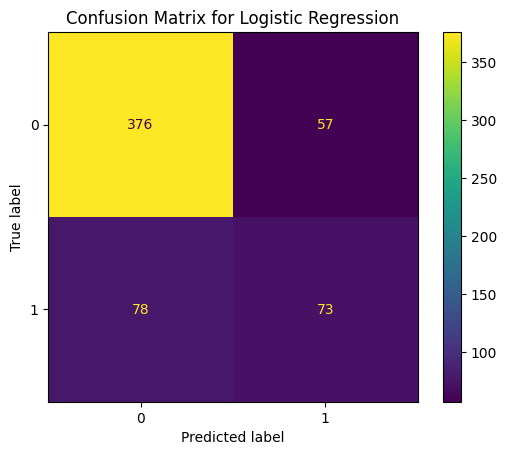

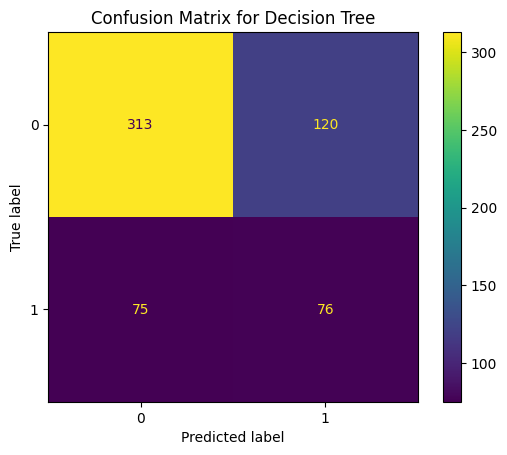

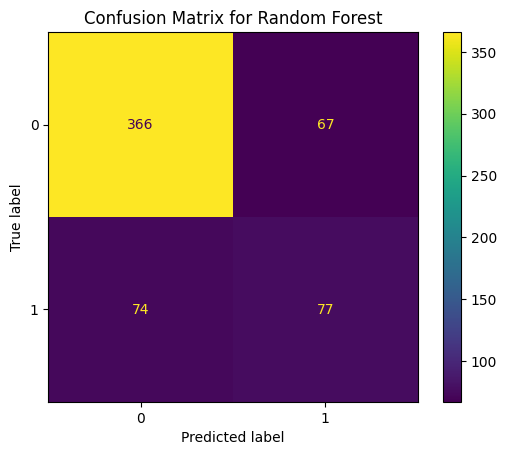

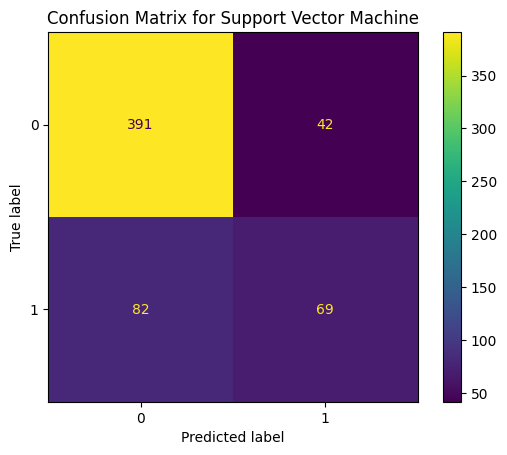

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.768836,0.759247,0.768836,0.762934
1,Decision Tree,0.666096,0.698378,0.666096,0.678596
2,Random Forest,0.758562,0.755001,0.758562,0.756665
3,Support Vector Machine,0.787671,0.773629,0.787671,0.776150


In [678]:
#initialize an empty dictionary to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

eval_results = []
#loop through the models
for model_name, model in models.items():
    #fit the model
    model.fit(X_train, y_train)
    #get the y predictions
    y_pred = model.predict(X_test)
    #classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    #from the classification report, get the precision, recall and f1 score
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    #calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    eval_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    #display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    #plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()



#append the results to the dataframe
results = pd.DataFrame(eval_results)
results



- If we build models and fit them with the X_train and y_train data we get SVM model as having the highest accuracy and f1 score(harmonic mean of precision and recall) folowed by Logistic Regression model.

### Fitting models with balanced classes in y

- But before we take it as it is, let's check the y variable and see if it is balanced

In [679]:
#check if y is imbalanced
y.value_counts()


BattleOutcome
0    1686
1     650
Name: count, dtype: int64

- Y variable is not balanced thus can affect the accuracy and the f1 score of a model and lead to biased model performance.
- Let's go ahead to balance it and fit the models again to see if there is any change. We use the SMOTE technique.(Synthetic Minority Over-sampling Technique)
- SMOTE is a technique that focuses on the minority class, which has fewer instances than the majority class.

In [680]:
#Balance the data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#check the value counts of the resampled data
y_train_resampled.value_counts()

BattleOutcome
0    1253
1    1253
Name: count, dtype: int64

- Now the y variable has balanced classes.

- Go ahead to fit the models again, gettting the same parameters as before

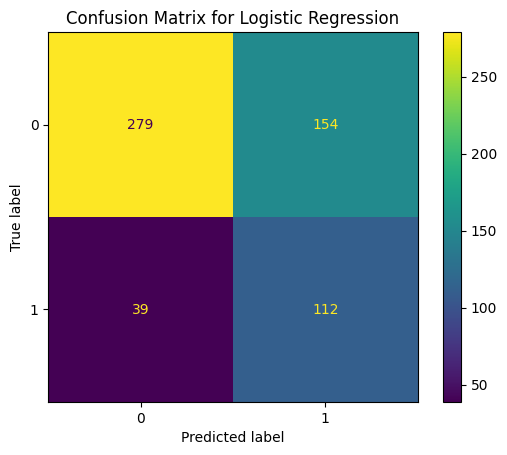

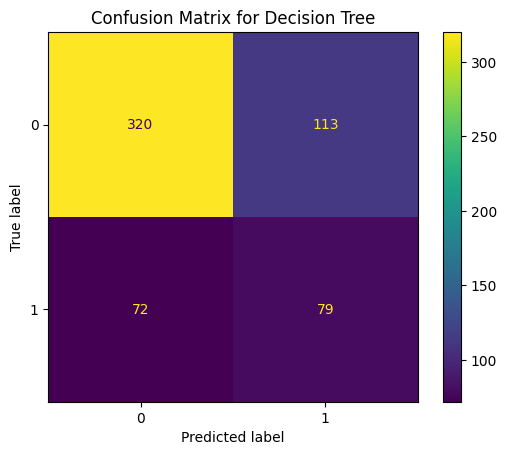

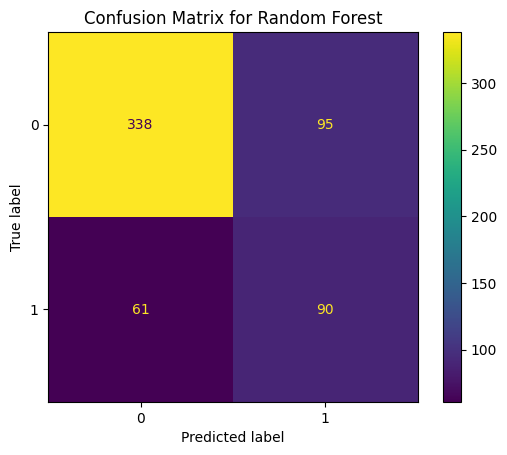

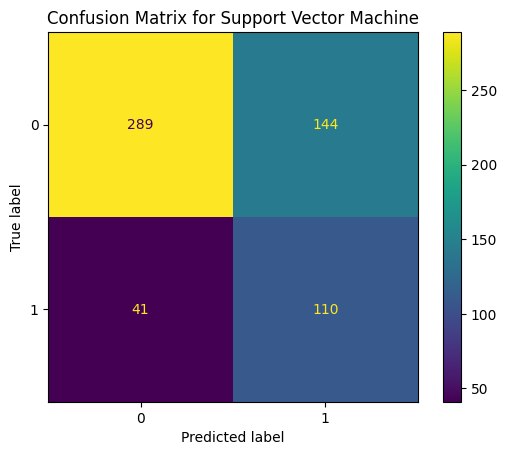

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.669521,0.759375,0.669521,0.689787
1,Decision Tree,0.683219,0.711643,0.683219,0.694281
2,Random Forest,0.732877,0.753872,0.732877,0.740934
3,Support Vector Machine,0.683219,0.761296,0.683219,0.702120


In [681]:
#fit the models on the resampled data
results_resampled = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
eval_results_resampled = []

#loop through the models
for model_name, model in models.items():
    #fit the model
    model.fit(X_train_resampled, y_train_resampled)
    #get the y predictions
    y_pred = model.predict(X_test)
    #classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    #from the classification report, get the precision, recall and f1 score
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    #calculate the accuracy
    accuracy = accuracy_score(y_test,y_pred)
    

    #display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    #plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

    eval_results_resampled.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

#append the results to the dataframe
results_resampled = pd.DataFrame(eval_results_resampled)
results_resampled



- On balancing the y variable the Random Forest Model performs best with the highest accuracy 74% and F1 score of 75%.SVM model comes in second with an accuracy of 68% and f1 score of 70%, then Decision trees and lastly Logistic Regression.

### ROC AND AUC 

- On getting the ROC Curve and AUC 

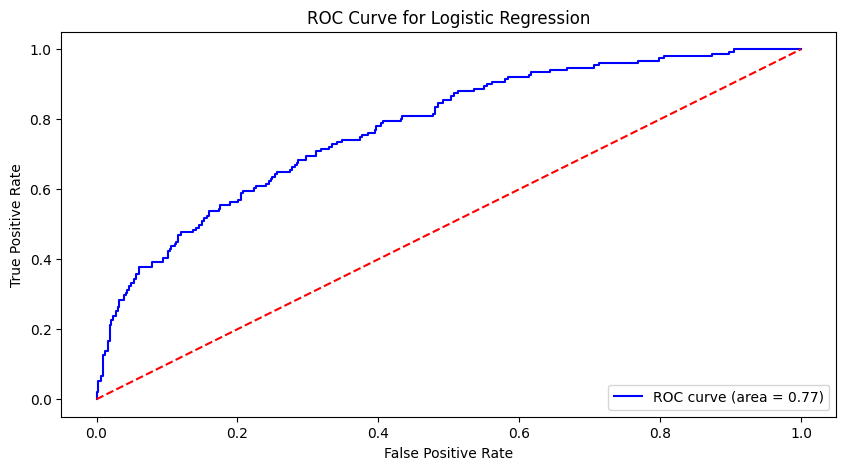

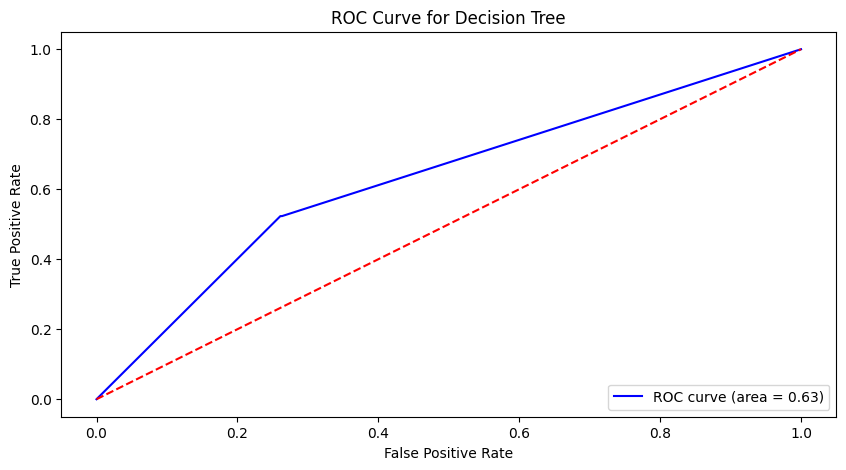

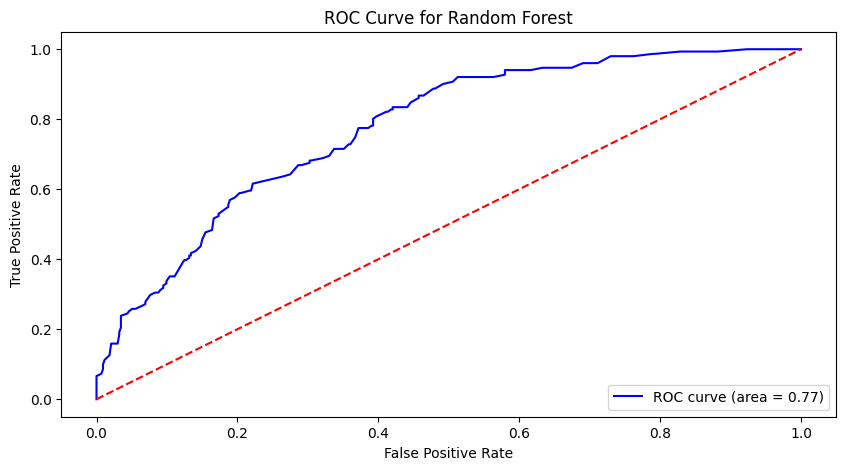

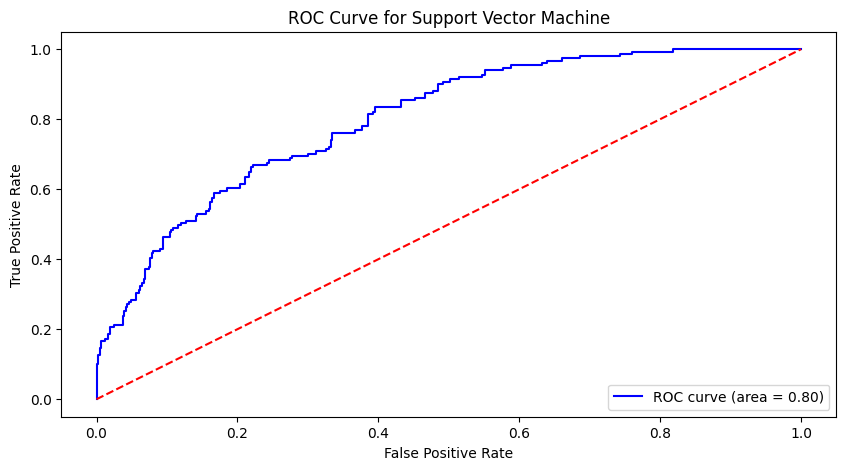

In [682]:
 #get the roc curve and auc for logistic regression and random forest
for model_name, model in models.items():
  #draw the roc curve for linear models
  if model_name == 'Logistic Regression'  or model_name == 'Support Vector Machine':
    y_pred_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_score)
    roc_auc = auc(fpr, tpr)
    #plot the roc curve
    plt.figure(figsize=(10,5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
  else:
    #draw the roc curve for non-linear models. Random Forest and Decision Tree
    y_pred_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_score)
    roc_auc = auc(fpr, tpr)
    #plot the roc curve
    plt.figure(figsize=(10,5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

- If AUC = 1.0: Perfect classifier, perfectly distinguishes between all positive and negative samples.
- AUC = 0.5: No discriminative ability, equivalent to random guessing.
- AUC < 0.5: Worse than random guessing, meaning it may predict the opposite of the actual classes. 
- Based on the above results, SVM model comes in first with the leftmost ROC curve and the highest AUC score of 0.80.The SVM model has good discriminative ability. An AUC of 0.80 indicates that the model can correctly differentiate between the positive and negative classes 80% of the time. This is considered a good performance.
- The Random Forest model comes in second with an AUC score of 0.78. This means that the Random Forest model also has good discriminative ability, with an AUC of 0.78. This is slightly lower than SVM but still shows strong performance.
- The Logistic Regression model has a fair discriminative ability, with an AUC of 0.77. This is still quite good and only marginally lower than the Random Forest. 
- The Decision Tree model has limited discriminative ability, with an AUC of 0.63. This suggests it is not performing as well as the other models in distinguishing between the positive and negative classes.



- let's go ahead and choose the  Logistic Regression and Random Forest model to continue analysis instead of SVM although SVM model scored higher.
- Logistic Regression because it has good interpretability and we choose Random Forest model because:
1. RF models are particularly good at handling complex and non-linear relationships between features without needing extensive tuning
2. RF handle large datasets and feature sets well and provide feature importance scores, which help in understanding which features are most influential in predicting battle outcomes.
3. They provide feature importance, which helps in understanding the impact of each feature on predictions.

- But first, to improve the performance of the two models we need to tune the parameters.

### Hyperparameters Tuning

- Logistic Regression

In [683]:
# tune the hyperparameters
#define the hyperparameters to tune
param_grid_logreg={
    #type of overfitting regularization whether l1 lasso or l2 ridge
    'penalty': ['l1', 'l2'] ,
    #regularization strength
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    #solver to use in the optimization problem
    'solver': ['liblinear', 'saga']
}

#initialize the logistic regression model specifying the maximum number of iterations to prevent convergence warning
logreg = LogisticRegression(max_iter=1000)

#initialize the grid search with cross validation(cv=5) and scoring as accuracy to get the best hyperparameters
grid_search = GridSearchCV(estimator=logreg,param_grid=param_grid_logreg,cv=5,scoring='accuracy')


In [684]:
#fit the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

#get the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_) #best score is the mean cross-validated score of the best_estimator

Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.7270622102408728


              precision    recall  f1-score   support

           0       0.88      0.63      0.73       433
           1       0.41      0.75      0.53       151

    accuracy                           0.66       584
   macro avg       0.64      0.69      0.63       584
weighted avg       0.76      0.66      0.68       584

Accuracy: 0.66
Precision: 0.76
Recall: 0.66
F1 Score: 0.68


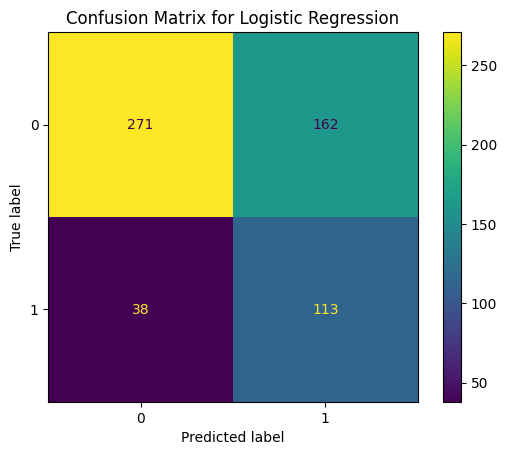

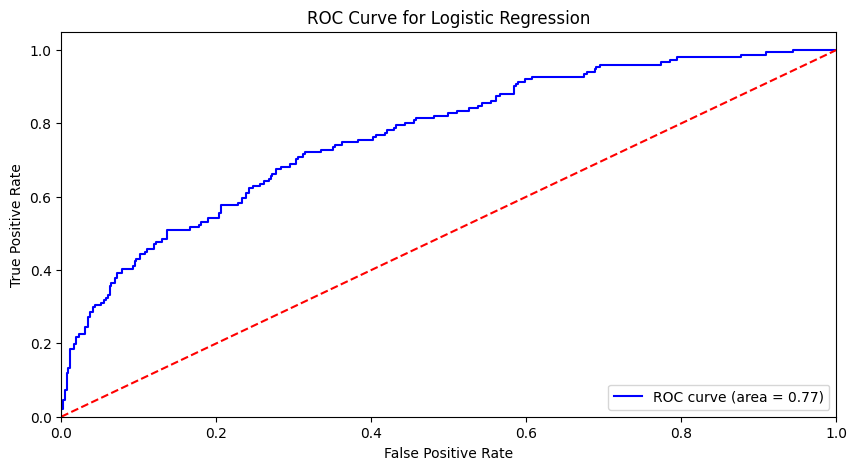

In [685]:
#initialize the logistic regression model with the best hyperparameters
logreg = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', max_iter=1000)

#fit the model on the resampled data
logreg.fit(X_train_resampled, y_train_resampled)

#get the y predictions
y_pred = logreg.predict(X_test)

#classification report
report = classification_report(y_test, y_pred, output_dict=True)
#display the classification report
print(classification_report(y_test, y_pred))
#print accuracy score
print(f"Accuracy: {round(accuracy_score(y_test, y_pred),2)}")
#get precision, recall and f1 score from the classification report
print(f"Precision: {round(report['weighted avg']['precision'],2)}")
print(f"Recall: {round(report['weighted avg']['recall'],2)}")
print(f"F1 Score: {round(report['weighted avg']['f1-score'],2)}")

#display confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

#plot the roc curve and auc for logistic regression
#1. get the y probability scores
y_pred_score = logreg.decision_function(X_test)
#2. get the fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
#3. calculate the auc
roc_auc = auc(fpr,tpr)

#4. plot the roc curve
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr, color = 'blue', label=f'ROC curve (area = {roc_auc:.2f})')
#plot the 45 degree line
plt.plot([0,1], [0,1], color='red', linestyle='--')
#set the limits of the x and y axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#set the labels for x and y axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#set the title of the plot
plt.title('ROC Curve for Logistic Regression')
#display the legend
plt.legend(loc='lower right')
#show the plot
plt.show()





- From the above results:
1. An accuracy of 0.66 means that 66% of your predictions are correct. Accuracy is the proportion of correctly predicted instances (both true positives and true negatives) out of the total number of instances.
2. A precision of 0.76 indicates that when your model predicts a positive class (e.g., a win in a battle), it is correct 76% of the time.
- Precision is the proportion of true positive predictions among all positive predictions (i.e., how many of the predicted positive instances are actually positive).

3. A recall of 0.66 means that your model correctly identifies 66% of all actual positives (e.g., all actual wins). 
-  Recall (or Sensitivity) is the proportion of true positives that are correctly identified by the model (i.e., how many actual positives are captured by the model).
4. An F1 score of 0.68 indicates a balance between precision and recall.
5. An AUC of 0.77 indicates that the model has a good, but not perfect, ability to distinguish between positive and negative classes (e.g., between wins and losses). The model is 77% likely to rank a randomly chosen positive instance higher than a randomly chosen negative instance.

- Hyperparameters for Random Forest

In [686]:
#choosing hyperparameters for random forest
param_grid_rf = {
    #number of trees in the forest
    'n_estimators': [50, 100, 200],
    #maximum depth of the tree
    'max_depth': [None, 10, 20, 30],
    #minimum number of samples required to split an internal node
    'min_samples_split': [2, 5]
    
}

#initialize the random forest model
random = RandomForestClassifier( random_state=42)

#initialize the grid search with cross validation(cv=5) and scoring as accuracy to get the best hyperparameters
grid_search_rf = GridSearchCV(estimator=random, param_grid=param_grid_rf, cv=5, scoring='accuracy')

#fit the grid search on the training data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

#get the best hyperparameters
print('Best hyperparameters:', grid_search_rf.best_params_)
print('Best score:', grid_search_rf.best_score_) #best score is the mean cross-validated score of the best_estimator


Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8460075864207839


              precision    recall  f1-score   support

           0       0.85      0.79      0.82       433
           1       0.51      0.62      0.56       151

    accuracy                           0.74       584
   macro avg       0.68      0.70      0.69       584
weighted avg       0.76      0.74      0.75       584

Random Forest Accuracy: 0.74
Precision: 0.76
Recall: 0.74
F1 Score: 0.75


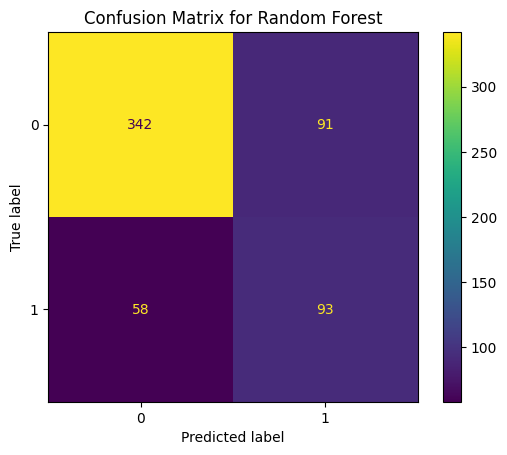

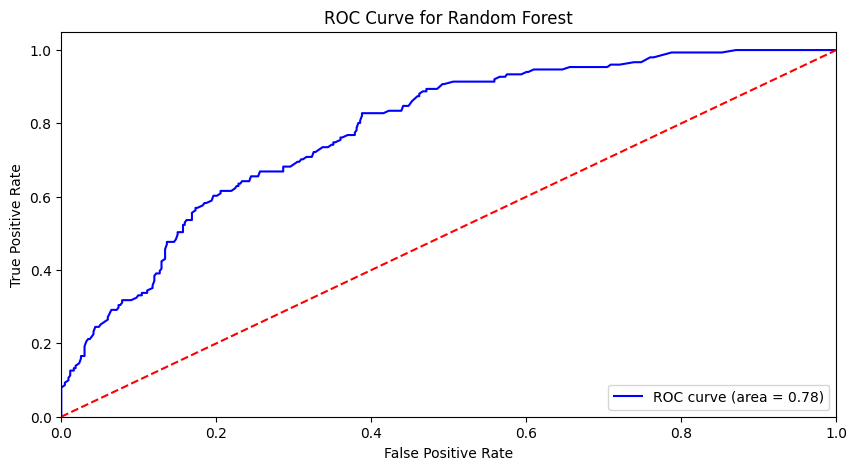

In [687]:
# initialize the random forest model with the best hyperparameters
random = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=200, random_state=42)

#fit the model on the resampled data
random.fit(X_train_resampled, y_train_resampled)

#get the y predictions
y_pred = random.predict(X_test)

#classification report
report = classification_report(y_test, y_pred, output_dict=True)
#display the classification report
print(classification_report(y_test, y_pred))
#print accuracy score
print(f'Random Forest Accuracy: {round(accuracy_score(y_test, y_pred),2)}')
#get precision, recall and f1 score from the classification report
print(f"Precision: {round(report['weighted avg']['precision'],2)}")
print(f"Recall: {round(report['weighted avg']['recall'],2)}")
print(f"F1 Score: {round(report['weighted avg']['f1-score'],2)}")

#display confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
disp.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

#plot the roc curve and auc for random forest
#1. get the y probability scores
y_pred_score = random.predict_proba(X_test)[:,1]
#2. get the fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
#3. calculate the auc
roc_auc = auc(fpr,tpr)

#4. plot the roc curve
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr, color = 'blue', label=f'ROC curve (area = {roc_auc:.2f})')
#plot the 45 degree line
plt.plot([0,1], [0,1], color='red', linestyle='--')
#set the limits of the x and y axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#set the labels for x and y axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#set the title of the plot
plt.title('ROC Curve for Random Forest')
#display the legend
plt.legend(loc='lower right')
#show the plot
plt.show()




- Compared to the Logistic Regression model the Random Forest model performs way better. With an accuracy of 74%, f1 score of 0.75, precision of 76% and recall of 74%

- Using Random Forest you can get the most important features as it allows for feature selection using feature importance


### Important Features

- Let's Examine the most important features.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4656\2397549711.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


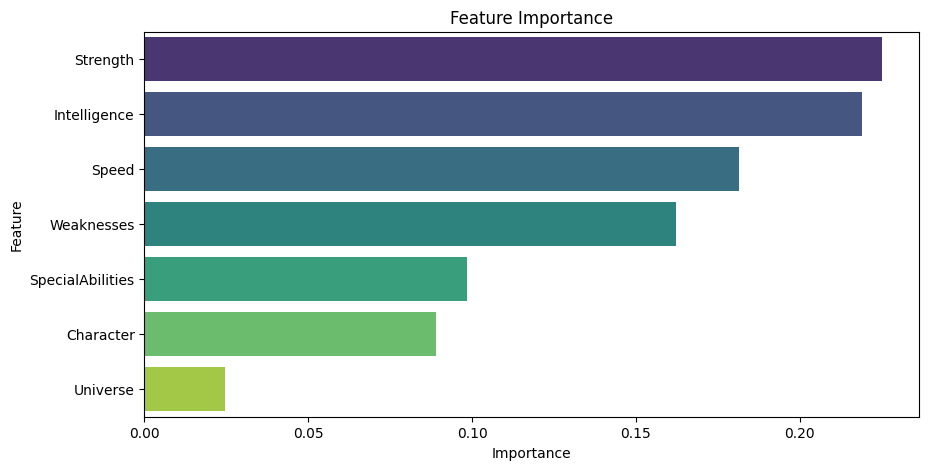

In [688]:
#determine the most important features in the random forest model
# get the feature importances
important_features = random.feature_importances_

# get the columns
columns = X.columns

#create a dataframe for the feature importance 
feature_importance = pd.DataFrame({
    'Feature': columns,
    'Importance': important_features
})

#sort the dataframe by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

#plot the feature importance
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance")
plt.show()




- Displaying the feature importance list and the level of importance

In [689]:
feature_importance

,Feature,Importance
2,Strength,0.225239
4,Intelligence,0.219109
3,Speed,0.181430
6,Weaknesses,0.162116
5,SpecialAbilities,0.098537
0,Character,0.088992
1,Universe,0.024578


- According to Random Forest model , Strength, Intelligence, and Speed are the most important features in the model, suggesting these attributes are crucial for predicting battle success.
- Weaknesses also play a significant role, which indicates that a character's vulnerabilities are important to consider.
- Special Abilities and Character have less influence but still contribute to the model.
- Universe has the least impact and may not be as relevant for your predictions.


- Set thresholds for strength, speed and intelligence to predict battle outcomes using Random Forest model

In [690]:
# Define thresholds (example: 75th percentile)
strength_threshold = df['Strength'].quantile(0.75)
speed_threshold = df['Speed'].quantile(0.75)
intelligence_threshold = df['Intelligence'].quantile(0.75)


In [691]:
high_performance_characters = df[
    (df['Strength'] >= strength_threshold) &
    (df['Speed'] >= speed_threshold) &
    (df['Intelligence'] >= intelligence_threshold)
]


In [692]:
# Example: Lower is better if a lower weakness score indicates fewer weaknesses
high_performance_characters = high_performance_characters[
    high_performance_characters['Weaknesses'] <= high_performance_characters['Weaknesses'].median()
]

In [693]:
# Predict battle outcomes using your model
predictions = model.predict(high_performance_characters[['Character','Universe','Strength', 'Speed', 'Intelligence','SpecialAbilities', 'Weaknesses']])
high_performance_characters['Predicted Outcome'] = predictions

In [694]:
 #display the high performance characters
# Filter characters predicted to win
likely_winners = high_performance_characters[high_performance_characters['Predicted Outcome'] == 1].sort_values(by='Strength', ascending=False)
likely_winners

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome,Predicted Outcome
668,3,1,1.613156,1.624136,1.119064,0,1,1,1
1524,3,1,1.613156,1.624136,1.597641,1,1,1,1
1707,4,1,1.613156,1.170900,1.119064,0,1,1,1
2131,0,0,1.148184,1.170900,1.597641,2,1,1,1
411,6,1,1.148184,1.624136,1.119064,1,0,1,1
558,7,0,1.148184,0.843695,1.597641,2,0,1,1
595,2,0,1.148184,1.170900,1.597641,1,1,1,1
1885,0,0,1.148184,1.624136,0.831011,1,0,1,1
1396,6,1,1.148184,1.170900,1.119064,0,0,0,1
1754,5,0,1.148184,0.843695,1.597641,1,1,1,1


- Our dataframe is not readable thus decode the columns then inverse transform numerical columns to make the df readable

In [695]:
#create a mapping function to decode the data
mapping_function ={
    'Character': { 0: 'Batman', 1: 'Captain America', 2: 'Flash', 3:'Iron Man', 4:'SpiderMan', 5:'Superman', 6:'Thor',7:'WonderWoman'},
    'Universe': {0: 'DC Comics', 1: 'Marvel'},
    'SpecialAbilities':{0:'Flight',1:'Invisibility',2:'SuperStrength',3:'Telekinesis'},
    'Weaknesses':{0:'Kryptonite',1:'Magic',2:'Silver',3:'Wooden Stake'}
}

In [696]:
#map the function to the individual columns
likely_winners.replace(mapping_function, inplace=True)

In [697]:
likely_winners

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome,Predicted Outcome
668,Iron Man,Marvel,1.613156,1.624136,1.119064,Flight,Magic,1,1
1524,Iron Man,Marvel,1.613156,1.624136,1.597641,Invisibility,Magic,1,1
1707,SpiderMan,Marvel,1.613156,1.170900,1.119064,Flight,Magic,1,1
2131,Batman,DC Comics,1.148184,1.170900,1.597641,SuperStrength,Magic,1,1
411,Thor,Marvel,1.148184,1.624136,1.119064,Invisibility,Kryptonite,1,1
558,WonderWoman,DC Comics,1.148184,0.843695,1.597641,SuperStrength,Kryptonite,1,1
595,Flash,DC Comics,1.148184,1.170900,1.597641,Invisibility,Magic,1,1
1885,Batman,DC Comics,1.148184,1.624136,0.831011,Invisibility,Kryptonite,1,1
1396,Thor,Marvel,1.148184,1.170900,1.119064,Flight,Kryptonite,0,1
1754,Superman,DC Comics,1.148184,0.843695,1.597641,Invisibility,Magic,1,1


In [698]:
#for the numerical columns speed, strength and intelligence, change the values to their original values
likely_winners[['Intelligence']] = scaler2.inverse_transform(likely_winners[['Intelligence']])
likely_winners


,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome,Predicted Outcome
668,Iron Man,Marvel,1.613156,1.624136,0.844344,Flight,Magic,1,1
1524,Iron Man,Marvel,1.613156,1.624136,1.000000,Invisibility,Magic,1,1
1707,SpiderMan,Marvel,1.613156,1.170900,0.844344,Flight,Magic,1,1
2131,Batman,DC Comics,1.148184,1.170900,1.000000,SuperStrength,Magic,1,1
411,Thor,Marvel,1.148184,1.624136,0.844344,Invisibility,Kryptonite,1,1
558,WonderWoman,DC Comics,1.148184,0.843695,1.000000,SuperStrength,Kryptonite,1,1
595,Flash,DC Comics,1.148184,1.170900,1.000000,Invisibility,Magic,1,1
1885,Batman,DC Comics,1.148184,1.624136,0.752252,Invisibility,Kryptonite,1,1
1396,Thor,Marvel,1.148184,1.170900,0.844344,Flight,Kryptonite,0,1
1754,Superman,DC Comics,1.148184,0.843695,1.000000,Invisibility,Magic,1,1


In [699]:
#scaler.inverse_transform(likely_winners[['Speed', 'Strength', 'Intelligence']])
likely_winners[['Strength','Speed','Intelligence']] = scaler.inverse_transform(likely_winners[['Strength','Speed','Intelligence']])
likely_winners

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome,Predicted Outcome
668,Iron Man,Marvel,10.0,10.0,9.0,Flight,Magic,1,1
1524,Iron Man,Marvel,10.0,10.0,10.0,Invisibility,Magic,1,1
1707,SpiderMan,Marvel,10.0,10.0,9.0,Flight,Magic,1,1
2131,Batman,DC Comics,10.0,10.0,10.0,SuperStrength,Magic,1,1
411,Thor,Marvel,10.0,10.0,9.0,Invisibility,Kryptonite,1,1
558,WonderWoman,DC Comics,10.0,9.0,10.0,SuperStrength,Kryptonite,1,1
595,Flash,DC Comics,10.0,10.0,10.0,Invisibility,Magic,1,1
1885,Batman,DC Comics,10.0,10.0,8.0,Invisibility,Kryptonite,1,1
1396,Thor,Marvel,10.0,10.0,9.0,Flight,Kryptonite,0,1
1754,Superman,DC Comics,10.0,9.0,10.0,Invisibility,Magic,1,1


- These characters as the audience know them:

- Special Abilities:

    1. Flight:
        - Superman: Can fly at incredible speeds, including into space.
        - Thor: Can fly using his hammer, Mjölnir, and later with Stormbreaker.
        - Iron Man: Flies using the propulsion systems in his armor.
        - Wonder Woman: Can fly in some comic versions and adaptations.

    2. Telekinesis:
        - None of the listed characters have telekinesis as a primary ability. However, Wonder Woman and Thor have used telekinetic-like powers in certain storylines (e.g., moving objects or weapons with magical means).

    3. Invisibility:
        - None of these characters inherently have the ability to turn invisible. However, Batman can use stealth techniques and gadgets to stay hidden, and Iron Man has used cloaking technology in some suit versions.

    4. Super Strength:
        - Superman: Has immense superhuman strength.
        - Wonder Woman: Possesses superhuman strength, rivaling Superman.
        - Thor: Has god-like strength.
        - Spider-Man: Has superhuman strength, but on a smaller scale compared to Superman or Thor.
        - Captain America: Has enhanced strength due to the super-soldier serum, but less than Superman or Thor.



- Weaknesses:

    1. Kryptonite:
        Superman: Kryptonite is a radioactive element from his home planet that weakens and can kill him.

    2. Wooden Stake:
        None of these characters have a specific weakness to wooden stakes. This is typically associated with vampires, not any of the listed superheroes.

    3. Magic:
        - Superman: Is vulnerable to magic, which can bypass his usual invulnerability.
        - Wonder Woman: Has some resistance to magic but is not completely immune.
        - Thor: As a god, he has some magical abilities but can also be affected by powerful magic.

    4. Silver:
        None of the listed characters are particularly vulnerable to silver. This weakness is more often associated with werewolves and some supernatural beings.

- From the above analysis:
1. Strength is the most important feature for winning the battle.
2. Other than Strength, Speed and Intelligence also affects battle outcome. The higher all three are the more the chances of winning.


 These characters would make an interesting battle:

1. **Iron Man (Marvel) vs. Batman (DC Comics):** Iron Man (ID: 1524) with Invisibility and weakness to Magic vs. Batman (ID: 2131) with SuperStrength and weakness to Magic.
- Why It's Interesting: Both characters have high intelligence (10.0) and are tacticians who rely on technology and strategy. Iron Man's invisibility would give him a stealth advantage, while Batman's superstrength would make him a formidable physical opponent. Their shared weakness to magic could add an element of unpredictability if magic users are involved in the fight.

2. **Thor (Marvel) vs. Superman (DC Comics):** Thor (ID: 411) with Invisibility and weakness to Kryptonite vs. Superman (ID: 399) with Invisibility and weakness to Kryptonite.
- Why It's Interesting: Both Thor and Superman are incredibly powerful with similar strengths and speeds. Adding invisibility for both makes the battle more tactical, as they would need to rely on their other senses and intelligence to outmaneuver each other. Their shared weakness to Kryptonite could introduce an interesting dynamic if Kryptonite is present or can be used by either side.

3. **Wonder Woman (DC Comics) vs. Captain America (Marvel):** Wonder Woman (ID: 558) with SuperStrength and weakness to Kryptonite vs. Captain America (ID: 1258) with Telekinesis and weakness to Magic.
- Why It's Interesting: Wonder Woman’s super strength and combat skills would be pitted against Captain America's tactical expertise and telekinetic abilities. The combination of strength and telekinesis could create a visually dynamic battle, with both heroes capable of powerful physical and mental maneuvers.

4. **Flash (DC Comics) vs. Spider-Man (Marvel):** Flash (ID: 1864) with Invisibility and weakness to Magic vs. Spider-Man (ID: 2339) with Flight and weakness to Magic.
- Why It's Interesting: Flash’s super speed combined with invisibility would make him a difficult target, while Spider-Man’s agility and flight abilities would allow him to navigate the battlefield with ease. Their shared weakness to magic could add a surprising twist if a magical element is introduced during the fight.

5. **Thor (Marvel) vs. Wonder Woman (DC Comics):** Thor (ID: 1417) with Invisibility and weakness to Magic vs. Wonder Woman (ID: 475) with SuperStrength and weakness to Magic.
- Why It's Interesting: Both Thor and Wonder Woman are powerful warriors with divine or god-like origins. Thor's invisibility could provide a tactical advantage against Wonder Woman’s combat skills and super strength. With both characters vulnerable to magic, any introduction of magical elements could sway the battle in unexpected ways.

6. **Iron Man (Marvel) vs. Superman (DC Comics):** Iron Man (ID: 1793) with Invisibility and weakness to Kryptonite vs. Superman (ID: 70) with Flight and weakness to Magic.
- Why It's Interesting: Iron Man’s invisibility could allow him to launch surprise attacks on Superman, who relies on his superior strength and flight capabilities. The differences in their weaknesses (Kryptonite vs. Magic) mean that environmental factors or allies could play a significant role in the outcome of their battle.